# MegaMart Sales Data Analysis
This notebook performs end-to-end analysis on MegaMart's sales dataset to uncover insights about sales, profits, and customer behavior.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load data
df = pd.read_csv('megamart_sales.csv')
df.head()

,Order_ID,Date,Customer_ID,Product,Category,Quantity,Price,Discount,City,Payment_Method,Profit
0,1,2024-09-29,C045,Mobile Phone,Electronics,1,20000,0.07,Bengaluru,Debit Card,2694.53
1,2,2024-12-12,C121,Jeans,Fashion,2,1500,0.19,Hyderabad,UPI,350.23
2,3,2024-06-15,C116,Headphones,Electronics,4,2000,0.15,Hyderabad,Credit Card,1748.13
3,4,2024-10-01,C148,Jeans,Fashion,2,1500,0.12,Chennai,Debit Card,468.69
4,5,2024-06-27,C107,Refrigerator,Appliances,3,30000,0.03,Hyderabad,Credit Card,22992.50


In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])



In [5]:
# Create new columns
df['Revenue'] = df['Quantity'] * df['Price'] * (1 - df['Discount'])
df['Month'] = df['Date'].dt.to_period('M')

# Check for missing values
print(df.isnull().sum())

# Basic statistics
df.describe()


Order_ID          0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Price             0
Discount          0
City              0
Payment_Method    0
Profit            0
Revenue           0
Month             0
dtype: int64


,Order_ID,Date,Quantity,Price,Discount,Profit,Revenue
count,300.000000,300,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,2024-07-07 14:04:48,2.900000,13688.666667,0.098967,8039.320333,34770.296667
min,1.000000,2024-01-02 00:00:00,1.000000,800.000000,0.000000,83.060000,680.000000
25%,75.750000,2024-04-19 00:00:00,2.000000,2000.000000,0.050000,1130.075000,4862.500000
50%,150.500000,2024-07-04 00:00:00,3.000000,5000.000000,0.100000,2929.760000,14625.000000
75%,225.250000,2024-10-01 00:00:00,4.000000,25000.000000,0.150000,11389.805000,50550.000000
max,300.000000,2024-12-31 00:00:00,5.000000,60000.000000,0.200000,68116.570000,297000.000000
std,86.746758,NaN,1.398757,15753.717135,0.058789,10917.623508,46765.363517


##  Monthly Revenue Trend

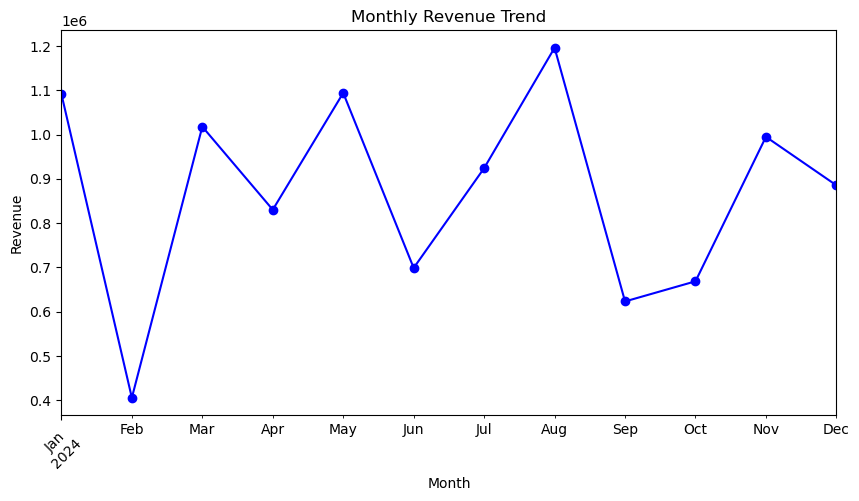

In [6]:

monthly_sales = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


## Top 5 Products by Revenue

C:\Users\nenav\AppData\Local\Temp\ipykernel_16588\1925613869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


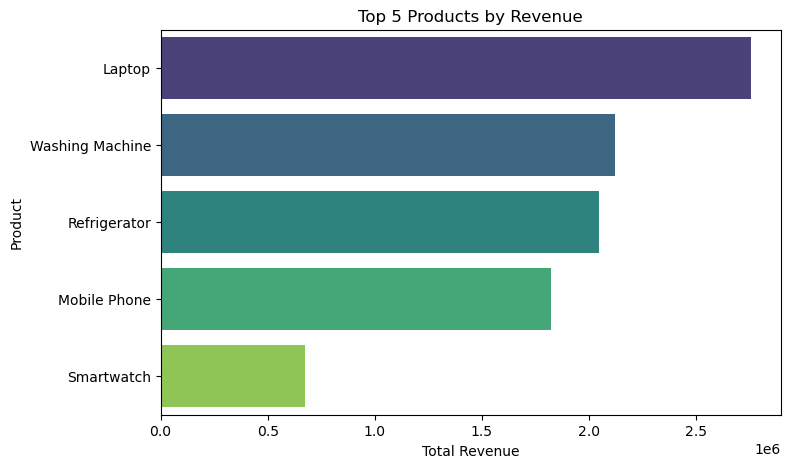

In [7]:

top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()


##  Sales by City

C:\Users\nenav\AppData\Local\Temp\ipykernel_16588\1803647438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='coolwarm')


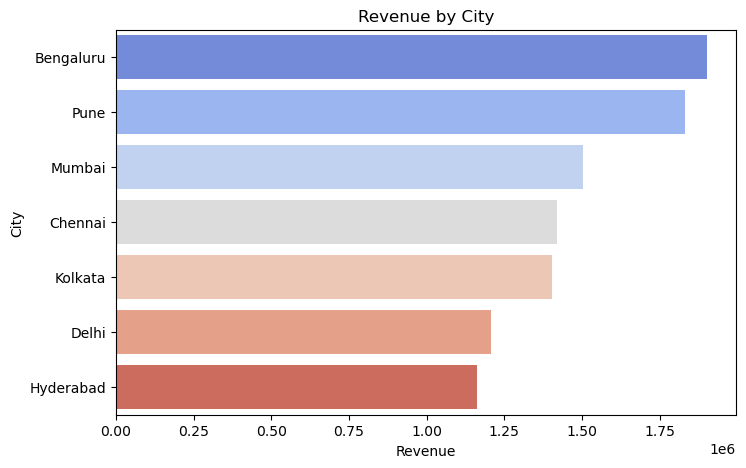

In [8]:

city_sales = df.groupby('City')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='coolwarm')
plt.title('Revenue by City')
plt.xlabel('Revenue')
plt.ylabel('City')
plt.show()


## Payment Method Distribution

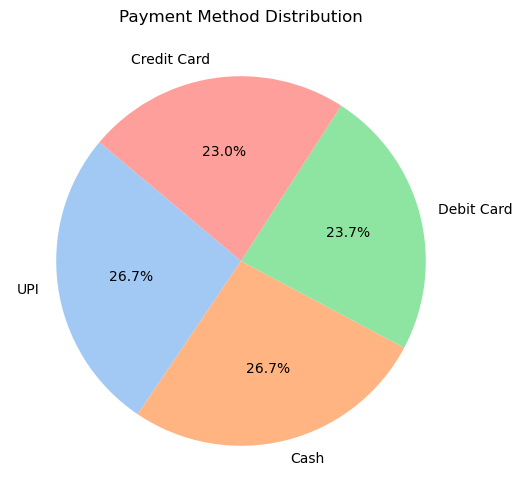

In [9]:

payment_counts = df['Payment_Method'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution')
plt.show()


## Profit vs Discount

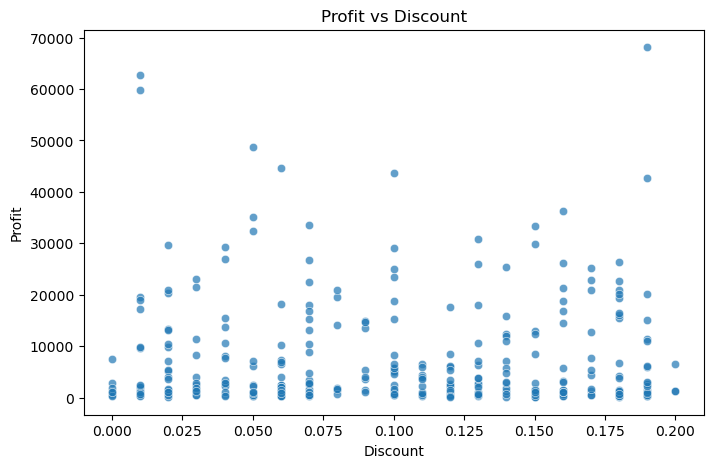

In [10]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.7)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


## 🧠 Key Insights
- **Electronics** category contributes the most revenue.
- Lowest performing **Hyderabad** City, **Mumbai & Pune** are top-performing cities.
- **UPI** and **Cash** dominate payment methods.
- Higher discounts don't always lead to higher profits.
- Peak sales occur during **August and festive months (Nov–Dec)**.